# The ML Pipeline

In this exercise sheet the focus will not be on e. g. a specific classification procedure that you have to understand and train but on everything else around it. You will get to know about important aspects of the ML methodology including generating synthetic data, extracting features, splitting up the data set for training and testing as well as evaluation methods. Whenever you will implement another ML method in the upcoming days you can rely on what you learn today.

In [42]:
# imports
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate data

`get_data1` - draws N uniformly distributed samples from $-\pi$ to $\pi$.  
`get_data1` and `get_data2` - adds normal distributed noise with the given noise factor

In [2]:
def get_data1(N=1000, noise=.1):

    def circle(x,radius):
        return np.sin(x) * radius, np.cos(x) * radius
    
    y = rng.randint(0,2,N)
    X = rng.uniform(-np.pi,np.pi,N)
    
    X = np.array([circle(x,radius) for x,radius in zip(X,rng.uniform(4,8,2)[y])])
    X += noise * rng.randn(*X.shape)
    
    # translate by noise + random 
    X[:,0] += noise * rng.uniform(0,10)
    X[:,1] += noise * rng.uniform(0,10)

    return X,y

def get_data2(N=1000, noise=.5):
    
    y = rng.randint(0,2,N)
    X = np.linspace(0, 6, N)
    
    def desc(x):
        return x, -x + 6
    
    def asc(x):
        return x,x
    
    X = np.array([asc(x) if yc == 1 else desc(x) for x,yc in zip(X, y)])
    
    X += noise * rng.randn(*X.shape)
    
    # translate
    X[:,0] += noise * rng.uniform(0,10)
    X[:,1] += noise * rng.uniform(0,10)

    return X,y

In [3]:
X1,y1 = get_data1(noise=.2)

In [4]:
X2,y2 = get_data2(noise=.2)

Ex 3: create a scatterplot of the X values and color the points according to their y value. Please make sure that both axes have the same scaling.

In [5]:
def plot_data(X,y):
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.axis('equal')

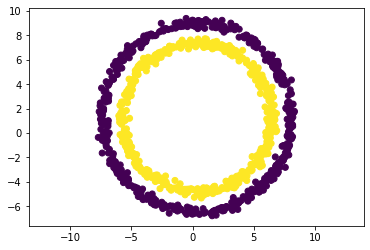

In [6]:
plot_data(X1,y1)

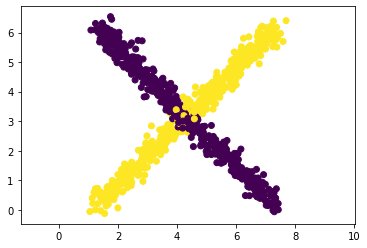

In [7]:
plot_data(X2,y2)

## extract features

`extract_features_basic()` - Center the given data around zero.  
`extract_features1()` - With the knowledge you have about the structure of the data, create a custom one dimensional feature representation in that the classes are lineary separable  
`extract_features2` With the knowledge you have about the structure of the data, create a custom two dimensional feature representation in that the classes are lineary separable  

In [8]:
def extract_features_basic(X):
    X[:,0] = X[:,0] - np.mean(X[:,0])
    X[:,1] = X[:,1] - np.mean(X[:,1])
    return X

In [9]:
def extract_features1(X):
    X = extract_features_basic(X)
    X = np.sqrt(X[:,0]**2+X[:,1]**2)
    #X[:,1] = -1 * np.sign(X[:,0]) * X[:,1]
    
    return X

In [10]:
def extract_features2(X):
    X = extract_features_basic(X)
    X[:,0] = X[:,0] * X[:,1]
    zeroes = np.zeros(X.shape)
    zeroes[:,0] = X[:,0]

    return zeroes


In [11]:
X1_feat = extract_features1(X1)

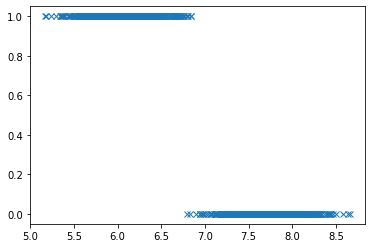

In [12]:
_ = plt.plot(X1_feat, y1, "x")

In [13]:
X2_feat = extract_features2(X2)

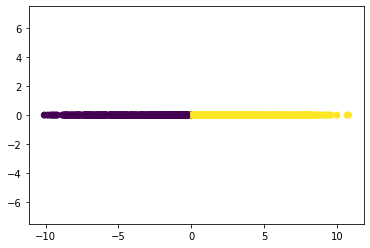

In [14]:
plot_data(X2_feat, y2)

`train_test_split` - function that splits `X` and `y` in two parts of `test_portion` ratio. Whether the samples should be shuffled depends on `perform_shuffle`.

In [29]:
def shuffle_data(X,y):
    c = list(zip(X, y))
    rng.shuffle(c)
    X, y = zip(*c)
    
    return X,y

In [30]:
def train_test_split(X, y, test_portion=.25, perform_shuffle=True):
    if(perform_shuffle):
        X, y = shuffle_data(X,y)
    X_train, X_test, X_val = np.split(X, [int((1-test_portion) * len(X)), int(1 * len(X))])
    y_train, y_test, y_val = np.split(y, [int((1-test_portion) * len(y)), int(1 * len(y))])

    return X_train, y_train, X_test, y_test

In [31]:
X1_train, y1_train, X1_test, y1_test = train_test_split(X1_feat, y1)
X2_train, y2_train, X2_test, y2_test = train_test_split(X2_feat, y2)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(750,)
(750,)
(250,)
(250,)


In the following two cells a classifier is given. In this exercise you should not worry about how the classifier works, just note that the predictions of the different X splits are stored in `train_prediction1`, `test_prediction1` (first data set), `train_prediction2`, `test_prediction2` (second data set)

In [32]:
clf1 = LogisticRegression(solver='lbfgs')
clf1.fit(X1_train.reshape(len(X1_train), 1), y1_train)
train_prediction1 = clf1.predict(X1_train.reshape(len(X1_train), 1))
test_prediction1 = clf1.predict(X1_test.reshape(len(X1_test), 1))

In [33]:
clf2 = LogisticRegression(solver='lbfgs')
clf2.fit(X2_train.reshape(len(X2_train), 2), y2_train)
train_prediction2 = clf2.predict(X2_train.reshape(len(X2_train), 2))
test_prediction2 = clf2.predict(X2_test.reshape(len(X2_test), 2))

## Evaluation    

EX8: please compute the four evaluation methods 
    1. precision
    2. recall
    3. accuracy
    4. f1 score


In [34]:
def evaluate(y_pred, y_true):
    true_pos = 0
    false_pos = 0
    false_neg = 0
    true_neg = 0

    for i,j in zip(y_pred,y_true):
        if i == 1 and j == 1:
            true_pos += 1
        elif i == 1 and j == 0:
            false_pos += 1
        elif i == 0 and i == 1:
            false_neg += 1
        else:
            true_neg += 1
        
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos + false_neg)
    accuracy = (true_pos + true_neg)/len(y_pred)
    print("precision=", precision)
    print("recall=", recall)
    print("accuracy=",accuracy)
    print("f1=", 2 * ((precision * recall)/(precision + recall)))    

### First data set

In [36]:
evaluate(test_prediction1, y1_test)

precision= 0.9915966386554622
recall= 1.0
accuracy= 0.996
f1= 0.9957805907172996


Ploting the test set `X1_test` as histogram and visualize the decision boundary of the classifier `clf1`. Hint: You can use `clf1.predict(...)` to generate new output.

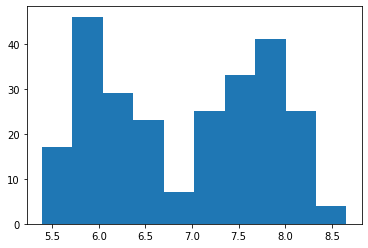

In [37]:
_ = plt.hist(X1_test)

### Second data set

In [38]:
evaluate(test_prediction2, y2_test)

precision= 0.9823008849557522
recall= 1.0
accuracy= 0.992
f1= 0.9910714285714286


Ploting the X2_test as a scatter plot and visualize the decision boundary of `clf2` as a contour. Hint: `plt.contourf(...)` can be used to plot a contour.

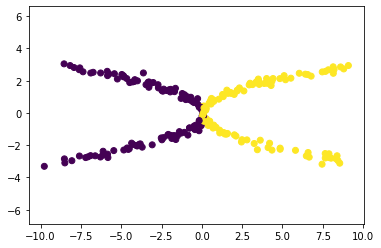

In [39]:
plot_data(X2_test, y2_test)

#### Generalization

Interpret the output of the following cell with regard to the concept of generalization. Point out the crucial parts that have an effect on generalization.

In [41]:
X2_feat = extract_features_basic(X2)

X2_train, y2_train, X2_test, y2_test = train_test_split(X2_feat, y2, test_portion=.5, perform_shuffle=False)

clf3 = LogisticRegression(solver='lbfgs')
clf3.fit(X2_train.reshape(len(X2_train), 2), y2_train)
train_prediction2 = clf3.predict(X2_train.reshape(len(X2_train), 2))
test_prediction2 = clf3.predict(X2_test.reshape(len(X2_test), 2))

print("training performance")
evaluate(train_prediction2, y2_train)
print("test performance")
evaluate(test_prediction2, y2_test)

training performance
precision= 0.9665271966527197
recall= 1.0
accuracy= 0.984
f1= 0.9829787234042554
test performance
precision= 0.4470046082949309
recall= 1.0
accuracy= 0.76
f1= 0.6178343949044587


It poorly generalize on the badly separated dataset, where 50% was used for training and 50% for testing without even shuffeling